#  Capstone Project of Group 1 of the DTU Data Science course 2020

## Notebook 3: Univariate Machine learning - LSTM and GRU

### Exercise description: 
A dataset was given with data obtained from the open data website edp.com and the task was given to create a prediction model for the power forecast based on the provided data.

### Project participants: 
Alessandro Sebastiani <aseb@dtu.dk>; Leonardo Andrès Alcayaga Romàn <lalc@dtu.dk>; Moritz Wegener <mbgw@kth.se>

### Work packages:

1. Insert and inspect data (Notebook 1)

2. Create a persistence model/reference model (Notebook 1)    
    
3. Annreg MLPregression model: Sklearn (Notebook 2)

4. Use uniivariate machine learning: GRU, LSTM
       
5. Use multivariate machine learning: GRU, LSTM
  
6. Results comparison






This notebook is structured as follows:

1. Insert and arrange data for the analysis

                       
2. Univariate machine learning - LSTM 

    2.1 One turbine case
    
    2.2 Full wind farm case 
    

3. Use univariate machine learning -  GRU 

    3.1 One turbine case 
    
    3.2 Full wind farm case 

Conclusions

# 1. Insert and arrange data

1. Load python packages
2. Read in dataset
3. Set date and time for data set
4. Define the dasets to be used for the analysis: one-turbine case and full wind farm case

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import pytz
from datetime import datetime
import os
current_path = os.getcwd()
print(current_path )

C:\Users\aseb\Documents\Alessandro\Courses\Data Science essentials\Group assignment\Final


In [2]:
dataset = pd.read_csv('DataScienceCourse_EDPdata.csv', sep=';')
dataset.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
0,T01,2016-01-02T10:10:00+00:00,258.3,120.3,195.4,41.4,30.0,33,34,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,15.5,2.0
1,T11,2016-01-02T10:20:00+00:00,282.3,221.0,248.8,17.0,28.0,33,33,33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,335.2,2.0
2,T11,2016-01-02T10:30:00+00:00,1391.5,242.8,582.2,444.5,28.0,33,33,33,...,0.0,-992.0,158.7,40.6,992.0,0.0,158.7,28,346.4,1.0
3,T09,2016-01-02T10:30:00+00:00,1398.4,231.2,735.4,496.5,28.0,33,33,33,...,0.0,-1000.0,341.3,167.1,1000.0,0.0,341.3,27,0.1,1.0
4,T01,2016-01-02T10:30:00+00:00,1428.7,217.3,927.5,463.3,30.0,34,34,34,...,0.0,-1000.0,306.6,336.9,1000.0,0.0,306.6,28,348.2,1.0


In [3]:
dataset.Timestamp = pd.to_datetime(dataset.Timestamp )
dataset.set_index('Timestamp', inplace=True)
dataset.sort_index(inplace=True)
dataset_power_WF = dataset[['Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Min', 'Grd_Prod_Pwr_Max']].groupby(level=0).sum()



In [4]:
channels= ['Turbine_ID','Grd_Prod_Pwr_Avg', 'Grd_Prod_Pwr_Std', 'Grd_Prod_Pwr_Max', 'Grd_Prod_Pwr_Min']
dataset_ch = dataset[channels].copy()
dataset_ch.tz_convert('UTC')
dataset_ch.sort_index(inplace=True)


In [5]:
### One turbine dataset to be used for univariate machine learning 
dataset_T1 = dataset_ch.loc[dataset_ch.Turbine_ID == 'T01' ,['Grd_Prod_Pwr_Avg'] ].copy()
dataset_T1 = dataset_T1.loc[dataset_T1.index.duplicated()== False] 

### Full wind farm dataset to be used for univariate machine learning 
dataset_WF = dataset_ch[['Grd_Prod_Pwr_Avg']].groupby(level=0).sum()
dataset_WF = dataset_WF.loc[dataset_WF.index.duplicated()== False] 

In [6]:
dataset_T1.head()

,Grd_Prod_Pwr_Avg
Timestamp,
2016-01-01 00:00:00+00:00,26.2
2016-01-01 00:10:00+00:00,10.1
2016-01-01 00:20:00+00:00,59.0
2016-01-01 00:30:00+00:00,135.7
2016-01-01 00:40:00+00:00,98.9


In [7]:
dataset_WF.head()

,Grd_Prod_Pwr_Avg
Timestamp,
2016-01-01 00:00:00+00:00,645.9
2016-01-01 00:10:00+00:00,650.3
2016-01-01 00:20:00+00:00,843.1
2016-01-01 00:30:00+00:00,1234.1
2016-01-01 00:40:00+00:00,1363.9


# 2. Univariate machine learning - LSTM 

1. Load python packages
2. Check missing time stamps and sample rate missing timesteps
3. Define function for shifting up the sequences

In [8]:
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import sklearn.ensemble

In [9]:
# 1. Check missing time steps and sample rate 

#  One-turbine dataset 

missing_time_stamps = pd.date_range(start=dataset_T1.index[0],
                                    end=dataset_T1.index[-1], 
                                    freq='10T').difference(dataset_T1.index) #
print('Number of Missing time stamps for Turbine 1:', missing_time_stamps.shape[0])

sampling_rate = '10T' # we have 10min resolution in our dataset
data_T1 = dataset_T1.resample(sampling_rate).asfreq()

#  Full-wind farm dataset 

missing_time_stamps = pd.date_range(start=dataset_WF.index[0],
                                    end=dataset_WF.index[-1], 
                                    freq='10T').difference(dataset_WF.index) #
print('Number of Missing time stamps for the full wind farm:', missing_time_stamps.shape[0])

data_WF = dataset_WF.resample(sampling_rate).asfreq()




Number of Missing time stamps for Turbine 1: 557
Number of Missing time stamps for the full wind farm: 355


In [10]:
### define a function that will prepare the shifting input sequences for the network
def forecast_sequences_input(input_data,n_lag):
    """
    A function that will split the input time series to sequences for nowcast/forecast problems
    Arguments:
        input_data: Time series of input observations as a list, NumPy array or pandas series
        n_lag: number of previous time steps to use for training, a.k.a. time-lag        
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    if len(input_data.shape)==1:
        n_vars=1
    else:        
        n_vars = input_data.shape[1] 
    df = pd.DataFrame(input_data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_lag, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together (aggregate)
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    return agg


### define a function that will prepare the shifting output sequences of the network
def forecast_sequences_output(output_data,n_out):
    """
    A function that will split the output time series to sequences for nowcast/forecast problems
    Arguments:
        output_data: Time series of input observations as a list, NumPy array or pandas series
        n_out: forecast horizon (for multi-output forecast)
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    if len(output_data.shape)==1:
        n_vars=1
    else:        
        n_vars = output_data.shape[1]
    df = pd.DataFrame(output_data)
    cols, names = list(), list()
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together (aggregate)
    agg = pd.concat(cols, axis=1)
    agg.columns = names    
    return agg

# 2.1 LSTM - One-turbine case


1. Define training and validation datasets
2. Define pad values to mask NaN
3. Define and train the model
4. Check for the accuracy of the predictions: plot the regression + calculate correlation coefficient and mean absolute error 


In [82]:
# Univariate one turbine case 
n_lag = 6
n_out = 6

X_input = forecast_sequences_input(data_T1['Grd_Prod_Pwr_Avg'].values,n_lag)
y_output = forecast_sequences_output(data_T1['Grd_Prod_Pwr_Avg'].values,n_out)

X_train, X_val, y_train, y_val = train_test_split(X_input, y_output, random_state=0, shuffle = True, test_size = 0.25)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_val_scaled = scaler.transform(X_val) 

y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.transform(y_val)  

#plt.hist(y_val_scaled.flatten(),bins=50)

In [83]:
pad_value = -5
X_train_scaled[np.isnan(X_train_scaled)] = pad_value
X_val_scaled[np.isnan(X_val_scaled)] = pad_value


y_train_scaled[np.isnan(y_train_scaled)] = pad_value
y_val_scaled[np.isnan(y_val_scaled)] = pad_value


(array([  803.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 49793., 23329., 13915.,  8648.,  6148.,  5086.,  4655.,
         4974., 14199.]),
 array([-5.        , -4.88000197, -4.76000394, -4.64000591, -4.52000788,
        -4.40000985, -4.28001182, -4.16001379, -4.04001576, -3.92001773,
        -3.8000197 , -3.68002167, -3.56002364, -3.44002561, -3.32002758,
        -3.20002955, -3.08003152, -2.96003349, -2.84003546, -2.72003743,
        -2.6000394 , -2.48004137, -2.36004334, -2.24004531, -2.12004728,
        -2.00004925, -1.88005122, -1.76005319, -1.64005516, -1.52005713,
        -1.4000591 , -1.28006107, -1.16006304, -1.04006501, -0.92006698,
        -0.80006895, -0.6800709

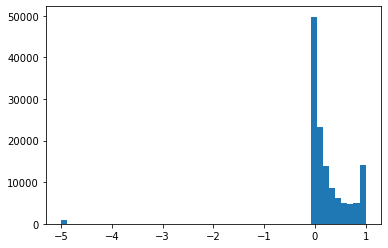

In [84]:
%matplotlib inline
plt.hist(X_val_scaled.flatten(),bins=50)


In [85]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Masking
import tensorflow.keras.backend as K
from tensorflow.keras.layers import LSTM, Masking
import datetime

# for multiple model creation - clear  the previous DAG
K.clear_session() 

### Input reshape for LSTM problem  [samples, timesteps, features]
no_features = 1 # Avg power output
no_outputs = 1
train_X = X_train_scaled.reshape((X_train_scaled.shape[0],n_lag,no_features)) # reshape the training input data to 3D via [samples, timesteps, features]
train_Y = y_train_scaled.reshape((y_train_scaled.shape[0],n_out,no_outputs))

validation_X = X_val_scaled.reshape((X_val_scaled.shape[0],n_lag,no_features)) # reshape the validation input data to 3D via [samples, timesteps, features]
validation_Y = y_val_scaled.reshape((y_val_scaled.shape[0],n_out,no_outputs))


### create model
model = Sequential()

# Masking layer (for the pad_value)
model.add(Masking(mask_value=pad_value, input_shape=(None, no_features)))

# First LSTM layer
model.add(LSTM(30, 
               return_sequences=False,  # important to add it to ensure the following LSTM layers will have the same input shape
               input_shape=(train_X.shape[1], train_X.shape[2]),                
               kernel_initializer='random_uniform',
               activation = 'relu',
               bias_initializer='zeros'))

# Second LSTM layer
#model.add(LSTM(10, activation='relu'))


# Output Layer
model.add(Dense(n_out, activation='relu'))
model.summary()

# compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# fit the model and store the graphs and performance to be used in TensorBoard (optional)
now = datetime.datetime.now().strftime("%Y%m%d_%H%M")

tbGraph = TensorBoard(log_dir=f'.\Graph\{now}',
                      histogram_freq=64*2, write_graph=True, write_images=True)

history = model.fit(train_X, train_Y, 
          epochs=30,
          batch_size=64, # higher batch size --> less parameter update --> e.g. faster training
          verbose=2,
          validation_data=(validation_X, validation_Y),
          callbacks=[tbGraph])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, None, 1)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 30)                3840      
_________________________________________________________________
dense (Dense)                (None, 6)                 186       
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
Train on 65772 samples, validate on 21925 samples
Epoch 1/30
65772/65772 - 15s - loss: 0.1326 - accuracy: 0.1799 - val_loss: 0.1051 - val_accuracy: 0.1707
Epoch 2/30
65772/65772 - 11s - loss: 0.1052 - accuracy: 0.1843 - val_loss: 0.1002 - val_accuracy: 0.2247
Epoch 3/30
65772/65772 - 11s - loss: 0.1022 - accuracy: 0.2051 - val_loss: 0.0983 - val_accuracy: 0.1803
Epoch 4/30
65772/65

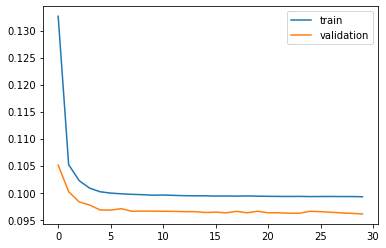

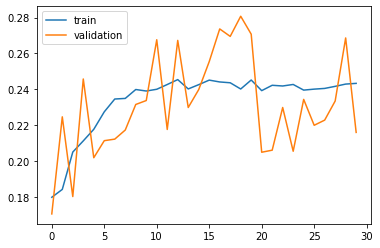

In [86]:
### plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

### plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

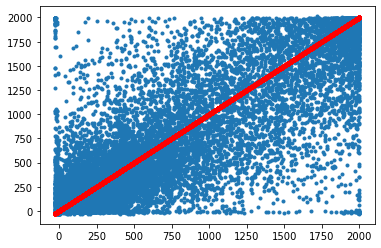

In [89]:
pred_y = model.predict(validation_X)
pred_val = scaler.fit(y_train).inverse_transform(pred_y)

plt.plot(y_val.values[:,-1],pred_val[:,-1],'.')
plt.plot(y_val.values[:,-1],y_val.values[:,-1],'.r')

In [92]:
from sklearn.metrics import mean_absolute_error as MAE
from scipy import stats
R_0 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,0]),0], pred_val[~np.isnan(y_val.values[:,0]),0])
R_1 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,1]),1], pred_val[~np.isnan(y_val.values[:,1]),1])
R_2 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,2]),2], pred_val[~np.isnan(y_val.values[:,2]),2])
R_3 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,3]),3], pred_val[~np.isnan(y_val.values[:,3]),3])
R_4 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,4]),4], pred_val[~np.isnan(y_val.values[:,4]),4])
R_5 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,-1]),-1], pred_val[~np.isnan(y_val.values[:,-1]),-1])

Error0 = MAE(y_val.values[~np.isnan(y_val.values[:,0]),0].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,0]),0]).reshape(-1,1))
Error1 = MAE(y_val.values[~np.isnan(y_val.values[:,1]),1].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,1]),1]).reshape(-1,1))
Error2 = MAE(y_val.values[~np.isnan(y_val.values[:,2]),2].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,2]),2]).reshape(-1,1))
Error3 = MAE(y_val.values[~np.isnan(y_val.values[:,3]),3].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,3]),3]).reshape(-1,1))
Error4 = MAE(y_val.values[~np.isnan(y_val.values[:,4]),4].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,4]),4]).reshape(-1,1))
Error5 = MAE(y_val.values[~np.isnan(y_val.values[:,5]),5].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,5]),5]).reshape(-1,1))

print('10 min forecast: R =', R_0 , ',MAE =' , Error0)
print('20 min forecast: R =', R_1 , ',MAE =' , Error1)
print('30 min forecast: R =', R_2 , ',MAE =' , Error2)
print('40 min forecast: R =', R_3 , ',MAE =' , Error3)
print('50 min forecast: R =', R_4 , ',MAE =' , Error4)
print('1 hr forecast: R =', R_5 , ',MAE =' , Error5)

10 min forecast: R = (0.9745792725379029, 0.0) ,MAE = 77.79246157415407
20 min forecast: R = (0.9489931585715403, 0.0) ,MAE = 110.2329816927719
30 min forecast: R = (0.9303588613404011, 0.0) ,MAE = 130.93670960456294
40 min forecast: R = (0.911081291972739, 0.0) ,MAE = 149.10288245932932
50 min forecast: R = (0.8925164539290813, 0.0) ,MAE = 164.96417513553678
1 hr forecast: R = (0.8760213169190443, 0.0) ,MAE = 179.24301085317333


# 2.2 LSTM - Full wind farm case


1. Define training and validation datasets
2. Define pad values to mask NaN
3. Define and train the model
4. Check for the accuracy of the predictions: plot the regression + calculate correlation coefficient and mean absolute error 



(array([5.0700e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.2257e+04, 2.7201e+04, 1.5086e+04, 1.0900e+04,
        9.2000e+03, 9.5570e+03, 6.8340e+03, 2.0000e+00, 6.0000e+00]),
 array([-5.        , -4.87984204, -4.75968408, -4.63952612, -4.51936816,
        -4.3992102 , -4.27905225, -4.15889429, -4.03873633, -3.91857837,
        -3.79842041, -3.67826245, -3.55810449, -3.43794653, -3.31778857,
        -3.19763061, -3.07747265, -2.9573147 , -2.83715674, -2.71699878,
        -2.59684082, -2.47

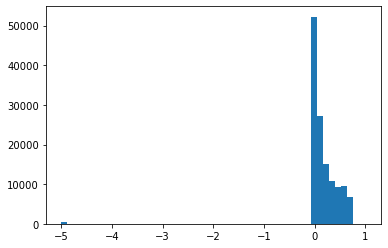

In [45]:
# Univariate Full turbine  case 

n_lag = 6
n_out = 6

X_input = forecast_sequences_input(data_WF['Grd_Prod_Pwr_Avg'].values,n_lag)
y_output = forecast_sequences_output(data_WF['Grd_Prod_Pwr_Avg'].values,n_out)

X_train, X_val, y_train, y_val = train_test_split(X_input, y_output, random_state=0, shuffle = True, test_size = 0.25)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_val_scaled = scaler.transform(X_val) 

y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.transform(y_val)  

pad_value = -5
X_train_scaled[np.isnan(X_train_scaled)] = pad_value
X_val_scaled[np.isnan(X_val_scaled)] = pad_value


y_train_scaled[np.isnan(y_train_scaled)] = pad_value
y_val_scaled[np.isnan(y_val_scaled)] = pad_value

%matplotlib inline
plt.hist(X_val_scaled.flatten(),bins=50)

In [46]:
# for multiple model creation - clear  the previous DAG
K.clear_session() 

### Input reshape for LSTM problem  [samples, timesteps, features]
no_features = 1 # Avg power output
no_outputs = 1
train_X = X_train_scaled.reshape((X_train_scaled.shape[0],n_lag,no_features)) # reshape the training input data to 3D via [samples, timesteps, features]
train_Y = y_train_scaled.reshape((y_train_scaled.shape[0],n_out,no_outputs))

validation_X = X_val_scaled.reshape((X_val_scaled.shape[0],n_lag,no_features)) # reshape the validation input data to 3D via [samples, timesteps, features]
validation_Y = y_val_scaled.reshape((y_val_scaled.shape[0],n_out,no_outputs))


### create model
model = Sequential()

# Masking layer (for the pad_value)
model.add(Masking(mask_value=pad_value, input_shape=(None, no_features)))

# First LSTM layer
model.add(LSTM(30, 
               return_sequences=False,  # important to add it to ensure the following LSTM layers will have the same input shape
               input_shape=(train_X.shape[1], train_X.shape[2]),                
               kernel_initializer='random_uniform',
               activation = 'relu',
               bias_initializer='zeros'))

# Second LSTM layer
#model.add(LSTM(10, activation='relu'))

# Output Layer
model.add(Dense(n_out, activation='relu'))
model.summary()

# compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# fit the model and store the graphs and performance to be used in TensorBoard (optional)
now = datetime.datetime.now().strftime("%Y%m%d_%H%M")

tbGraph = TensorBoard(log_dir=f'.\Graph\{now}',
                      histogram_freq=64*2, write_graph=True, write_images=True)

history = model.fit(train_X, train_Y, 
          epochs=30,
          batch_size=64, # higher batch size --> less parameter update --> e.g. faster training
          verbose=2,
          validation_data=(validation_X, validation_Y),
          callbacks=[tbGraph])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, None, 1)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 30)                3840      
_________________________________________________________________
dense (Dense)                (None, 6)                 186       
Total params: 4,026
Trainable params: 4,026
Non-trainable params: 0
_________________________________________________________________
Train on 65772 samples, validate on 21925 samples
Epoch 1/30
65772/65772 - 16s - loss: 0.0980 - accuracy: 0.2094 - val_loss: 0.0859 - val_accuracy: 0.1787
Epoch 2/30
65772/65772 - 12s - loss: 0.0873 - accuracy: 0.2193 - val_loss: 0.0843 - val_accuracy: 0.2292
Epoch 3/30
65772/65772 - 12s - loss: 0.0863 - accuracy: 0.2207 - val_loss: 0.0837 - val_accuracy: 0.2894
Epoch 4/30
65772/65

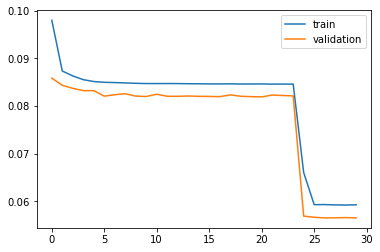

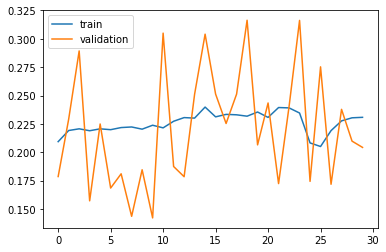

In [47]:
### plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

### plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

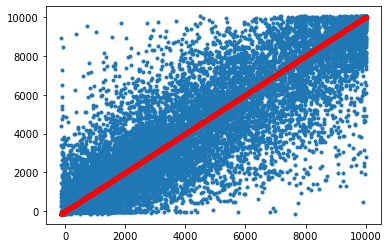

In [48]:
pred_y = model.predict(validation_X)
pred_val = scaler.fit(y_train).inverse_transform(pred_y)

plt.plot(y_val.values[:,-1],pred_val[:,-1],'.')
plt.plot(y_val.values[:,-1],y_val.values[:,-1],'.r')

In [56]:
from sklearn.metrics import mean_absolute_error as MAE
from scipy import stats
R_0 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,0]),0], pred_val[~np.isnan(y_val.values[:,0]),0])
R_1 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,1]),1], pred_val[~np.isnan(y_val.values[:,1]),1])
R_2 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,2]),2], pred_val[~np.isnan(y_val.values[:,2]),2])
R_3 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,3]),3], pred_val[~np.isnan(y_val.values[:,3]),3])
R_4 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,4]),4], pred_val[~np.isnan(y_val.values[:,4]),4])
R_5 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,-1]),-1], pred_val[~np.isnan(y_val.values[:,-1]),-1])

Error0 = MAE(y_val.values[~np.isnan(y_val.values[:,0]),0].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,0]),0]).reshape(-1,1))
Error1 = MAE(y_val.values[~np.isnan(y_val.values[:,1]),1].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,1]),1]).reshape(-1,1))
Error2 = MAE(y_val.values[~np.isnan(y_val.values[:,2]),2].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,2]),2]).reshape(-1,1))
Error3 = MAE(y_val.values[~np.isnan(y_val.values[:,3]),3].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,3]),3]).reshape(-1,1))
Error4 = MAE(y_val.values[~np.isnan(y_val.values[:,4]),4].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,4]),4]).reshape(-1,1))
Error5 = MAE(y_val.values[~np.isnan(y_val.values[:,5]),5].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,5]),5]).reshape(-1,1))

print('10 min forecast: R =', R_0 , ',MAE =' , Error0)
print('20 min forecast: R =', R_1 , ',MAE =' , Error1)
print('30 min forecast: R =', R_2 , ',MAE =' , Error2)
print('40 min forecast: R =', R_3 , ',MAE =' , Error3)
print('50 min forecast: R =', R_4 , ',MAE =' , Error4)
print('1 hr forecast: R =', R_5 , ',MAE =' , Error5)

10 min forecast: R = (0.9866897764893171, 0.0) ,MAE = 289.41050687791585
20 min forecast: R = (0.9686126499803573, 0.0) ,MAE = 444.30689824479083
30 min forecast: R = (0.9542094678450768, 0.0) ,MAE = 546.6900165758154
40 min forecast: R = (0.9414960833700747, 0.0) ,MAE = 633.3013016090467
50 min forecast: R = (0.9278639608231152, 0.0) ,MAE = 707.2650669863096
1 hr forecast: R = (0.9160959057588238, 0.0) ,MAE = 769.1878438447106


# 3.1 GRU - One turbine case


1. Define training and validation datasets
2. Define pad values to mask NaN
3. Define and train the model
4. Check for the accuracy of the predictions: plot the regression + calculate correlation coefficient and mean absolute error 

In [93]:
# Univariate one turbine case 
n_lag = 6
n_out = 6

X_input = forecast_sequences_input(data_T1['Grd_Prod_Pwr_Avg'].values,n_lag)
y_output = forecast_sequences_output(data_T1['Grd_Prod_Pwr_Avg'].values,n_out)

X_train, X_val, y_train, y_val = train_test_split(X_input, y_output, random_state=0, shuffle = True, test_size = 0.25)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_val_scaled = scaler.transform(X_val) 

y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.transform(y_val)  

pad_value = -5
X_train_scaled[np.isnan(X_train_scaled)] = pad_value
X_val_scaled[np.isnan(X_val_scaled)] = pad_value

y_train_scaled[np.isnan(y_train_scaled)] = pad_value
y_val_scaled[np.isnan(y_val_scaled)] = pad_value

In [94]:
from tensorflow.keras.layers import GRU


### Input reshape for GRU problem  [samples, timesteps, features]
no_features = 1 # Avg power output
no_outputs = 1
train_X = X_train_scaled.reshape((X_train_scaled.shape[0],n_lag,no_features)) # reshape the training input data to 3D via [samples, timesteps, features]
train_Y = y_train_scaled.reshape((y_train_scaled.shape[0],n_out,no_outputs))

validation_X = X_val_scaled.reshape((X_val_scaled.shape[0],n_lag,no_features)) # reshape the validation input data to 3D via [samples, timesteps, features]
validation_Y = y_val_scaled.reshape((y_val_scaled.shape[0],n_out,no_outputs))

### create model
model = Sequential()

# Masking layer (for the pad_value)
model.add(Masking(mask_value=pad_value, input_shape=(None, no_features)))


# First GRU layer
model.add(GRU(30, 
               return_sequences=True,  # important to add it to ensure the following LSTM layers will have the same input shape
               input_shape=(train_X.shape[1], train_X.shape[2]),                
               kernel_initializer='random_uniform',
               activation = 'relu',
               bias_initializer='zeros'))

# Second GRU layer
model.add(GRU(20, activation='relu'))

# Output Layer
model.add(Dense(n_out, activation='sigmoid'))
model.summary()

# compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# fit the model and store the graphs and performance to be used in TensorBoard (optional)
now = datetime.datetime.now().strftime("%Y%m%d_%H%M")

tbGraph = TensorBoard(log_dir=f'.\Graph\{now}',
                      histogram_freq=64*2, write_graph=True, write_images=True)

history = model.fit(train_X, train_Y, 
          epochs=30,
          batch_size=64,
          verbose=2,
          validation_data=(validation_X, validation_Y),
          callbacks=[tbGraph])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_1 (Masking)          (None, None, 1)           0         
_________________________________________________________________
gru (GRU)                    (None, None, 30)          2970      
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 126       
Total params: 6,216
Trainable params: 6,216
Non-trainable params: 0
_________________________________________________________________
Train on 65772 samples, validate on 21925 samples
Epoch 1/30
65772/65772 - 27s - loss: 0.1391 - accuracy: 0.1854 - val_loss: 0.1056 - val_accuracy: 0.2228
Epoch 2/30
65772/65772 - 20s - loss: 0.1061 - accuracy: 0.2079 - val_loss: 0.1028 - val_accurac

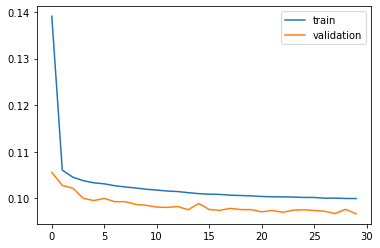

In [95]:
### plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

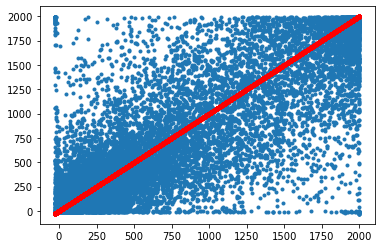

In [96]:
pred_y = model.predict(validation_X)
pred_val = scaler.fit(y_train).inverse_transform(pred_y)

plt.plot(y_val.values[:,-1],pred_val[:,-1],'.')
plt.plot(y_val.values[:,-1],y_val.values[:,-1],'.r')

In [97]:
from sklearn.metrics import mean_absolute_error as MAE
from scipy import stats
R_0 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,0]),0], pred_val[~np.isnan(y_val.values[:,0]),0])
R_1 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,1]),1], pred_val[~np.isnan(y_val.values[:,1]),1])
R_2 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,2]),2], pred_val[~np.isnan(y_val.values[:,2]),2])
R_3 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,3]),3], pred_val[~np.isnan(y_val.values[:,3]),3])
R_4 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,4]),4], pred_val[~np.isnan(y_val.values[:,4]),4])
R_5 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,-1]),-1], pred_val[~np.isnan(y_val.values[:,-1]),-1])

Error0 = MAE(y_val.values[~np.isnan(y_val.values[:,0]),0].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,0]),0]).reshape(-1,1))
Error1 = MAE(y_val.values[~np.isnan(y_val.values[:,1]),1].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,1]),1]).reshape(-1,1))
Error2 = MAE(y_val.values[~np.isnan(y_val.values[:,2]),2].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,2]),2]).reshape(-1,1))
Error3 = MAE(y_val.values[~np.isnan(y_val.values[:,3]),3].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,3]),3]).reshape(-1,1))
Error4 = MAE(y_val.values[~np.isnan(y_val.values[:,4]),4].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,4]),4]).reshape(-1,1))
Error5 = MAE(y_val.values[~np.isnan(y_val.values[:,5]),5].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,5]),5]).reshape(-1,1))

print('10 min forecast: R =', R_0 , ',MAE =' , Error0)
print('20 min forecast: R =', R_1 , ',MAE =' , Error1)
print('30 min forecast: R =', R_2 , ',MAE =' , Error2)
print('40 min forecast: R =', R_3 , ',MAE =' , Error3)
print('50 min forecast: R =', R_4 , ',MAE =' , Error4)
print('1 hr forecast: R =', R_5 , ',MAE =' , Error5)

10 min forecast: R = (0.9746465416485652, 0.0) ,MAE = 78.52198960442095
20 min forecast: R = (0.9491991481931223, 0.0) ,MAE = 110.26044607254595
30 min forecast: R = (0.9303958392179608, 0.0) ,MAE = 130.85623606915644
40 min forecast: R = (0.9112506273291854, 0.0) ,MAE = 149.07536746457217
50 min forecast: R = (0.8927656039597358, 0.0) ,MAE = 164.73237370035935
1 hr forecast: R = (0.875730585515768, 0.0) ,MAE = 178.9333883144062


# 3.2 GRU - Full wind farm case 

1. Define training and validation datasets
2. Define pad values to mask NaN
3. Define and train the model
4. Check for the accuracy of the predictions: plot the regression + calculate correlation coefficient and mean absolute error 

In [98]:
# Univariate Full turbine  case 
n_lag = 6
n_out = 6

X_input = forecast_sequences_input(data_WF['Grd_Prod_Pwr_Avg'].values,n_lag)
y_output = forecast_sequences_output(data_WF['Grd_Prod_Pwr_Avg'].values,n_out)

X_train, X_val, y_train, y_val = train_test_split(X_input, y_output, random_state=0, shuffle = True, test_size = 0.25)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_val_scaled = scaler.transform(X_val) 

y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.transform(y_val)  

pad_value = -5
X_train_scaled[np.isnan(X_train_scaled)] = pad_value
X_val_scaled[np.isnan(X_val_scaled)] = pad_value


y_train_scaled[np.isnan(y_train_scaled)] = pad_value
y_val_scaled[np.isnan(y_val_scaled)] = pad_value

In [99]:
### Input reshape for GRU problem  [samples, timesteps, features]
no_features = 1 # Avg power output
no_outputs = 1
train_X = X_train_scaled.reshape((X_train_scaled.shape[0],n_lag,no_features)) # reshape the training input data to 3D via [samples, timesteps, features]
train_Y = y_train_scaled.reshape((y_train_scaled.shape[0],n_out,no_outputs))

validation_X = X_val_scaled.reshape((X_val_scaled.shape[0],n_lag,no_features)) # reshape the validation input data to 3D via [samples, timesteps, features]
validation_Y = y_val_scaled.reshape((y_val_scaled.shape[0],n_out,no_outputs))


### create model
model = Sequential()

# Masking layer (for the pad_value)
model.add(Masking(mask_value=pad_value, input_shape=(None, no_features)))

# First GRU layer
model.add(GRU(30, 
               return_sequences=True,  # important to add it to ensure the following LSTM layers will have the same input shape
               input_shape=(train_X.shape[1], train_X.shape[2]),                
               kernel_initializer='random_uniform',
               activation = 'relu',
               bias_initializer='zeros'))
               

# Second GRU layer
model.add(GRU(20, activation='relu'))

# Output Layer
model.add(Dense(n_out, activation='sigmoid'))
model.summary()

# compile the model
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

# fit the model and store the graphs and performance to be used in TensorBoard (optional)
now = datetime.datetime.now().strftime("%Y%m%d_%H%M")

tbGraph = TensorBoard(log_dir=f'.\Graph\{now}',
                      histogram_freq=64*2, write_graph=True, write_images=True)

history = model.fit(train_X, train_Y, 
          epochs=30,
          batch_size=64,
          verbose=2,
          validation_data=(validation_X, validation_Y),
          callbacks=[tbGraph])



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_2 (Masking)          (None, None, 1)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, None, 30)          2970      
_________________________________________________________________
gru_3 (GRU)                  (None, 20)                3120      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 126       
Total params: 6,216
Trainable params: 6,216
Non-trainable params: 0
_________________________________________________________________
Train on 65772 samples, validate on 21925 samples
Epoch 1/30
65772/65772 - 27s - loss: 0.0931 - accuracy: 0.2031 - val_loss: 0.0637 - val_accuracy: 0.2626
Epoch 2/30
65772/65772 - 19s - loss: 0.0658 - accuracy: 0.2398 - val_loss: 0.0617 - val_accurac

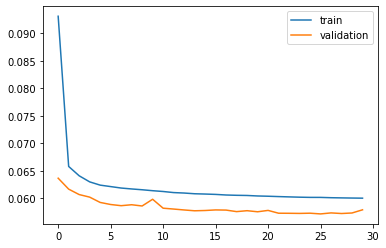

In [100]:
### plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

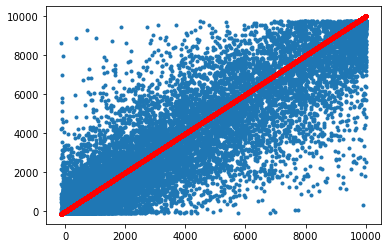

In [101]:
pred_y = model.predict(validation_X)
pred_val = scaler.fit(y_train).inverse_transform(pred_y)

plt.plot(y_val.values[:,-1],pred_val[:,-1],'.')
plt.plot(y_val.values[:,-1],y_val.values[:,-1],'.r')

In [102]:
from sklearn.metrics import mean_absolute_error as MAE
from scipy import stats
R_0 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,0]),0], pred_val[~np.isnan(y_val.values[:,0]),0])
R_1 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,1]),1], pred_val[~np.isnan(y_val.values[:,1]),1])
R_2 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,2]),2], pred_val[~np.isnan(y_val.values[:,2]),2])
R_3 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,3]),3], pred_val[~np.isnan(y_val.values[:,3]),3])
R_4 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,4]),4], pred_val[~np.isnan(y_val.values[:,4]),4])
R_5 = stats.pearsonr(y_val.values[~np.isnan(y_val.values[:,-1]),-1], pred_val[~np.isnan(y_val.values[:,-1]),-1])

Error0 = MAE(y_val.values[~np.isnan(y_val.values[:,0]),0].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,0]),0]).reshape(-1,1))
Error1 = MAE(y_val.values[~np.isnan(y_val.values[:,1]),1].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,1]),1]).reshape(-1,1))
Error2 = MAE(y_val.values[~np.isnan(y_val.values[:,2]),2].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,2]),2]).reshape(-1,1))
Error3 = MAE(y_val.values[~np.isnan(y_val.values[:,3]),3].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,3]),3]).reshape(-1,1))
Error4 = MAE(y_val.values[~np.isnan(y_val.values[:,4]),4].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,4]),4]).reshape(-1,1))
Error5 = MAE(y_val.values[~np.isnan(y_val.values[:,5]),5].reshape(-1,1)  , (pred_val[~np.isnan(y_val.values[:,5]),5]).reshape(-1,1))

print('10 min forecast: R =', R_0 , ',MAE =' , Error0)
print('20 min forecast: R =', R_1 , ',MAE =' , Error1)
print('30 min forecast: R =', R_2 , ',MAE =' , Error2)
print('40 min forecast: R =', R_3 , ',MAE =' , Error3)
print('50 min forecast: R =', R_4 , ',MAE =' , Error4)
print('1 hr forecast: R =', R_5 , ',MAE =' , Error5)

10 min forecast: R = (0.9865933715611815, 0.0) ,MAE = 306.51064739694107
20 min forecast: R = (0.9685328250585394, 0.0) ,MAE = 455.74173675190184
30 min forecast: R = (0.9541067920281774, 0.0) ,MAE = 559.3866584406991
40 min forecast: R = (0.9411484390261864, 0.0) ,MAE = 641.4248295068701
50 min forecast: R = (0.9276237057515498, 0.0) ,MAE = 718.0312352225196
1 hr forecast: R = (0.915781321669792, 0.0) ,MAE = 780.2196332253035


# Different test performed to define the  model (LSTM case)

Case 1: R = 0.728 

Case 2 (fit the scaler to only one vector): R = 0.737

Case 3 (Increase Neurons of 1st layer from 30 to 50): R = 1 but the prediction does not work

Case 4 (fit scaler to both X and Y, 1st layer reduced to 20 neurons): R = 0.744

Case 5 ( same as 4 but with 5 neurons in 2nd layer): Does not work

Case 6 (same as 4 but with MinMax scaler): R = 0.79, The predicted value gets maximum to 1750 (rather than 2000)

Case 7 (same as 6 but with 30 neurons in the first layer): R = 0.79, same limit as case 6 (1750)

Case 8 (same as 6 but withouth shuffling the data): R = 0.84, however the learning curve is not nice, validation losses much lower than training losses and learning curve is almost flat

Case 9 (same as 6 but with meanabsoluteerror): R = 0.79 but now the predicted values cover the whole interval 0-2000

Case 10 (same as 9 but neurons are 25 on 1st and 5 on second): R = 0.79 but steeper learning curve, limit is also good

Case 11 (same as 10 but with only one layer and 20 neurons in it): No clear difference with respect to 10

Case 12 (as 11 but with 30 neurons): R = 0.79, MAE = 174, good learning curve

Case 13 (same as 12 with no shuffle): R = 0.79 MAE = 161, validation losses are lower than training losses 

Final (same as 12 with 30 epochs): R= 0.79 MAE = 173.8, it learns again around epochs 15

Then, data avaialability was increased by reshaping tha data in a different way which resulted in less NaN. Then the value for the correlation coefficient slighlty decreased. A few more tested have been performed

Case 1, 30 on 1st  no snd layer: R = 0.765 MAE = 179.7 

Case 2, 30 on 1st and 10 on snd  layer: R = 0.767 MAE = 180.8 val losses lower than training losses
    
Case 3, 40 on 1st and 10 on snd layer: R = 0.765 MAE = 180.2 val losses lower than training losses
    
Case 4, 20 on 1st and 10 on snd: R = 0.766 MAE = 180.2 val losses lower than training losses
    
Case 5, 40 on 1st  no snd layer: R = 0.767 MAE = 179.6 val losses lower than training losses
    
Case 6, 50 on 1st and 10 on snd layer: R = 0.767 MAE = 179.4 val losses lower than training losses